## Word and Text analysis of redditors on r/singapore 

This report explores common words used in discussions on the r/singapore reddit forum, and attempts grouping of various threads/posts into clusters.
Last run on 4 December 2020

In [ ]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import PIL
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [244]:
# Visit reddit.com/r/singapore home page using selenium to obtain links to each post

def getsoup(url):     
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(10)
    data = driver.page_source
    driver.close()
    soup = BeautifulSoup(data, "html.parser")
    return soup

In [245]:
url = "https://www.reddit.com/r/singapore/top/?t=month"
# /top sorts the posts on the reddit singapore home page by most upvoted
# if this program is run periodically, sort by New may be more appropriate
# t=month gets the posts for the whole month

soup = getsoup(url)

In [246]:
# Get all hrefs from home page using bs4 

posts = soup.find_all('a', {'data-click-id': 'body'})

urls = []
for post in posts:
    current_url = post.get("href")
    urls.append( "https://www.reddit.com" + current_url + "?sort=confidence")

print(*urls,sep="\n")

https://www.reddit.com/r/singapore/comments/jodp3e/someone_redesigned_all_our_mrt_stations_as_famous/?sort=confidence
https://www.reddit.com/r/singapore/comments/jqac15/here_is_my_mom_standing_next_to_an_ad_of_herself/?sort=confidence
https://www.reddit.com/r/singapore/comments/jz81vs/old_is_gold_miss_the_old_packaging/?sort=confidence
https://www.reddit.com/r/singapore/comments/jn0pkj/the_singapore_storm_yesterday/?sort=confidence
https://www.reddit.com/r/singapore/comments/k012zr/thank_you/?sort=confidence
https://www.reddit.com/r/singapore/comments/jrzxad/the_event_thay_changed_you/?sort=confidence
https://www.reddit.com/r/singapore/comments/jwedq0/i_ate_a_mcspicy_and_didnt_lao_sai_emotional/?sort=confidence
https://www.reddit.com/r/singapore/comments/junen0/why_saw_this_at_plaza_sing_just_why/?sort=confidence
https://www.reddit.com/r/singapore/comments/jnarr9/after_a_heavy_downpour_little_india/?sort=confidence
https://www.reddit.com/r/singapore/comments/jsi21i/perks_of_working_til

In [248]:
def cut_soup(list_a):
    for string in list_a:
        if "More posts from the" in string:
            return (" ".join(list_a[0:((list_a.index(string))+1)])) 
            break

# def appendall_to_csv(row):
#     f = open("post_text.csv", "a", encoding='utf-8')
#     csv_writer = csv.writer(f)
#     csv_writer.writerow([row])
#     f.close()

In [249]:
# Go to every post and store text in a list

alltext = {}
i = 0

for page in urls:    
    driver = webdriver.Chrome()
    page_soup = getsoup(page)
    page_data = page_soup.prettify().splitlines()
    list1 = []
    for line in page_data:
        list1.append(line)
    cleanresults = cut_soup(list1)
    # Convert the cleaned post into bs4 object
    clean_results = BeautifulSoup(cleanresults)
    # Getting only the text 
    p_title = clean_results.find('h1')
    p_text = clean_results.find_all('p')# Note that this cuts up different paragraphs, even if in a single post
    # p_text = p_text[1:]  # removes duplicate of the original post's content
    text1 = {'title': '', 'body': []}
    text1['title'] = p_title.get_text().strip()
    for p in p_text:
        text1['body'].append(p.get_text().strip())
    alltext["thread" + str(i)] = text1
    i += 1

In [250]:
# Print first thread - check that it's complete
alltext["thread0"]
# Seems like it does not capture posts with negative scores - could be because negative posts are hidden by reddit

{'title': 'Someone redesigned all our MRT stations as famous logos',
 'body': ['LOL east west line logo stops at Tampines. Pasir Ris is crying now',
  'I found the missing Pasir Ris logo on the designer’s Instagram.                                               Here.',
  'I always knew we were too far from anyone else to be considered as part of the island. 😢',
  'Pasir Ris Baguette',
  'Pasir Ris not part of it cuz it got its own East Coast plan',
  'You’re right. No Pasir Ris.. I think they can use Rolls Royce logo for Pasir Ris to help placate the residents there lol',
  "Please check out the original designer: LePark Creations! I wanted to link the Facebook page but Facebook links aren't allowed :/  it's just facebook(dot)com/leparkcreations/",
  "Edit: I found his site, it's                                               http://www.hkxdesign.carbonmade.com/",
  'The one that makes me laugh really hard is Bedok Reservoir.',
  'What’s the original logo? I can’t rmb',
  'I would love 

In [251]:
# Print first 10 titles
j = 0
for thread in alltext:
    print(str(j))
    print(alltext[thread]['title'])
    j += 1
    if j >= 10:
        break

0
Someone redesigned all our MRT stations as famous logos
1
Here is my mom standing next to an ad of herself in Bedok MRT
2
Old is gold, miss the old packaging
3
The Singapore storm yesterday!!
4
Thank you!
5
The event thay changed you
6
i ate a mcspicy and didnt lao sai (emotional)
7
Why. Saw this at Plaza Sing, just why.
8
After a Heavy Downpour | Little India
9
Perks of working till ungodly hours 😔


In [252]:
# Print first 3 lines in body of first 10 threads
k = 0
for thread in alltext:
    print(str(k))
    print(alltext[thread]['body'][0:3])
    k += 1
    if k >= 10:
        break

0
['LOL east west line logo stops at Tampines. Pasir Ris is crying now', 'I found the missing Pasir Ris logo on the designer’s Instagram.                                               Here.', 'I always knew we were too far from anyone else to be considered as part of the island. 😢']
1
['Pretty cool', 'r/PimpYourMomForKarma', 'how she get chosen to be in ad?']
2
['nostalgic', 'remembered that i kept buying those in pri sch days', "My parents didn't allow me to buy at that time (Primary School). So I sat at one side and saw the others drinking it happily......"]
3
['Expecting an alien mothership to appear anytime now....', 'Imagine a Bill Pullman’s Independence Day speech by LHL , in a pink shirt.', '"Welcome to                                                 Earth                                                Singapore!"']
4
["Just feeling sad for him coz he's probably not gonna get tipped for delivering soggy food...", 'I would, even if its just 2 dollars. Especially on rainy days and

In [253]:
# Add each thread's text (title and all comments in body) into a single string
# To be used for text analysis later
threadtext = {}
k = 0
for thread in alltext:
    threadtext[thread] = alltext[thread]['title'] + " " + ' '.join([line for line in alltext[thread]['body']])
    k += 1

In [254]:
# Convert all free text into single list of tokens

words = []
for thread in threadtext:
    tokens = word_tokenize(threadtext[thread])
    words.extend(tokens) 

In [255]:
print(len(words))

52371


In [256]:
# Find number of unique tokens
unique = set(words)
print("No. of unique tokens: ", len(unique))
print("Average frequency of tokens: ", len(words)/len(unique))
print(sorted(unique)[:30])

No. of unique tokens:  7886
Average frequency of tokens:  6.641009383717981
['!', '#', '$', '%', '&', "'", "''", "'S", "'Singapore", "'Woah", "'You", "'common", "'d", "'explain", "'food", "'friendly", "'he", "'improved", "'ll", "'longest", "'m", "'minority", "'native", "'natively", "'normal", "'nothing", "'re", "'rumour", "'s", "'squashed"]


In [257]:
# Find tokens which only appear once
single=[w for w in unique if len(w) == 1 ]
print("No. of single character tokens: ", len(single))
print(single[0:40]) # lots of emojis, some chinese characters. 
# To incorporate these somehow in future as they carry useful information

No. of single character tokens:  118
['’', '0', '!', 'D', '”', '好', '3', 'i', '！', 'd', 'P', '=', '😜', '~', 'b', '🤔', '2', 'm', '_', '#', ':', 'e', '😔', 'M', '👋', '{', 'U', 'g', '😱', '😨', 'y', 'C', '😅', '😄', '\u200f', 'B', '😩', '😕', 'p', 'X']


In [258]:
# remove punctuations
words_nop = [w for w in words if w not in string.punctuation + "\"'`'...’“”``'''"]
print("Before punctuation removal: ", words[:50])
print("After punctuation removal: ", words_nop[:50])
print("No. of tokens before removing punctuation: ", len(words))
print("No. of tokens after removing punctuation: ", len(words_nop))
print("No. of unique tokens after removing punctuation: ", len(set(words_nop)))

Before punctuation removal:  ['Someone', 'redesigned', 'all', 'our', 'MRT', 'stations', 'as', 'famous', 'logos', 'LOL', 'east', 'west', 'line', 'logo', 'stops', 'at', 'Tampines', '.', 'Pasir', 'Ris', 'is', 'crying', 'now', 'I', 'found', 'the', 'missing', 'Pasir', 'Ris', 'logo', 'on', 'the', 'designer', '’', 's', 'Instagram', '.', 'Here', '.', 'I', 'always', 'knew', 'we', 'were', 'too', 'far', 'from', 'anyone', 'else', 'to']
After punctuation removal:  ['Someone', 'redesigned', 'all', 'our', 'MRT', 'stations', 'as', 'famous', 'logos', 'LOL', 'east', 'west', 'line', 'logo', 'stops', 'at', 'Tampines', 'Pasir', 'Ris', 'is', 'crying', 'now', 'I', 'found', 'the', 'missing', 'Pasir', 'Ris', 'logo', 'on', 'the', 'designer', 's', 'Instagram', 'Here', 'I', 'always', 'knew', 'we', 'were', 'too', 'far', 'from', 'anyone', 'else', 'to', 'be', 'considered', 'as', 'part']
No. of tokens before removing punctuation:  52371
No. of tokens after removing punctuation:  46447
No. of unique tokens after remov

In [259]:
# Convert all characters to lower case
words_lower = [w.lower() for w in words_nop]
print(words_lower[:50])
len(set(words_lower))

['someone', 'redesigned', 'all', 'our', 'mrt', 'stations', 'as', 'famous', 'logos', 'lol', 'east', 'west', 'line', 'logo', 'stops', 'at', 'tampines', 'pasir', 'ris', 'is', 'crying', 'now', 'i', 'found', 'the', 'missing', 'pasir', 'ris', 'logo', 'on', 'the', 'designer', 's', 'instagram', 'here', 'i', 'always', 'knew', 'we', 'were', 'too', 'far', 'from', 'anyone', 'else', 'to', 'be', 'considered', 'as', 'part']


6850

In [260]:
# stopwords list 
stop_words = list(stopwords.words('english'))

# Add custom words to stopwords 
stop_words.extend(["'ve", "'m", "'ll", "'re", "'t", "'s", "n't", "a", "'d","would", "reddit", "redditor", "subreddit", "singapore", "singaporeans"])
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

194

In [261]:
# Remove stopwords from words
words_nostop = [w for w in words_lower if w not in stop_words]
print(words_nostop[:50])
print("No. of tokens(before stopword removal): ", len(words_lower))
print("No. of tokens(after stopword removal): ", len(words_nostop))

['someone', 'redesigned', 'mrt', 'stations', 'famous', 'logos', 'lol', 'east', 'west', 'line', 'logo', 'stops', 'tampines', 'pasir', 'ris', 'crying', 'found', 'missing', 'pasir', 'ris', 'logo', 'designer', 'instagram', 'always', 'knew', 'far', 'anyone', 'else', 'considered', 'part', 'island', '😢', 'pasir', 'ris', 'baguette', 'pasir', 'ris', 'part', 'cuz', 'got', 'east', 'coast', 'plan', 'right', 'pasir', 'ris..', 'think', 'use', 'rolls', 'royce']
No. of tokens(before stopword removal):  46447
No. of tokens(after stopword removal):  23912


In [262]:
# remove numbers
words_nonum = [w for w in words_nostop if not w.isnumeric()]
print("No. of tokens(after removing numbers): ", len(words_nonum))

No. of tokens(after removing numbers):  23618


In [263]:
# Find most common words
print(FreqDist(words_nonum).most_common(50))

[('like', 212), ('one', 166), ('people', 162), ('time', 134), ('get', 117), ('work', 114), ('even', 109), ('good', 97), ('think', 96), ('really', 93), ('got', 88), ('still', 88), ('also', 84), ('see', 83), ('ns', 80), ('go', 77), ('much', 73), ('make', 72), ('know', 71), ('life', 69), ('shit', 68), ('could', 66), ('first', 65), ('take', 62), ('school', 62), ('years', 60), ('always', 59), ('actually', 59), ('want', 58), ('many', 58), ('mcspicy', 58), ('well', 57), ('back', 57), ('way', 54), ('us', 53), ('nice', 50), ('better', 50), ('day', 50), ('experience', 50), ('love', 49), ('looks', 48), ('need', 48), ('never', 48), ('regulars', 48), ('someone', 47), ('lol', 47), ('look', 46), ('chinese', 46), ('say', 45), ('long', 45)]


In [264]:
# Stemming using Porter Stemmer
porter = nltk.PorterStemmer()
words_porter = [porter.stem(w) for w in words_nonum] 
for w0, w1 in zip(words_nonum[:20], words_porter[:20]):
    print("{:15s}{:15s}".format(w0, w1))

someone        someon         
redesigned     redesign       
mrt            mrt            
stations       station        
famous         famou          
logos          logo           
lol            lol            
east           east           
west           west           
line           line           
logo           logo           
stops          stop           
tampines       tampin         
pasir          pasir          
ris            ri             
crying         cri            
found          found          
missing        miss           
pasir          pasir          
ris            ri             


In [265]:
len(set(words_porter))

5187

In [266]:
# Lemmatization
wnl = nltk.WordNetLemmatizer()
words_lem = [wnl.lemmatize(w) for w in words_nonum]
for w0, w1 in zip(words_nonum[:20], words_lem[:20]):
    print("{:15s}{:15s}".format(w0, w1))

someone        someone        
redesigned     redesigned     
mrt            mrt            
stations       station        
famous         famous         
logos          logo           
lol            lol            
east           east           
west           west           
line           line           
logo           logo           
stops          stop           
tampines       tampines       
pasir          pasir          
ris            ri             
crying         cry            
found          found          
missing        missing        
pasir          pasir          
ris            ri             


## Generate word cloud for all words in dataset

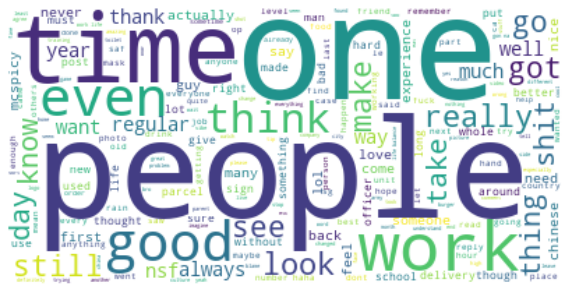

In [269]:
# Generate word cloud image
words_stemmed = " ".join(words_lem)
wc = WordCloud(background_color="white").generate(words_stemmed)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

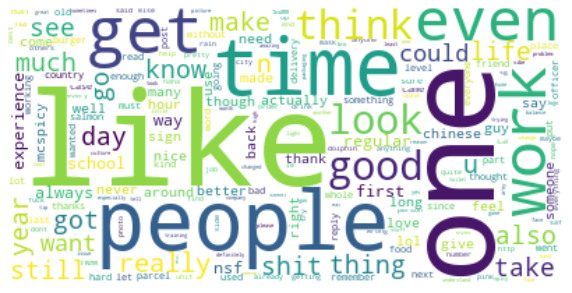

In [270]:
# Generate from frequency
wc2 = WordCloud(background_color="white")
wc2.generate_from_frequencies(nltk.FreqDist(words_lem))
plt.figure(figsize=(10,8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Reason for the slight differences between the 2 word clouds above:
# - parameters in WordCloud function include a built-in stopwords list, which could include words like "like"

## Generate word clouds for top 5 posts


Post title: Someone redesigned all our MRT stations as famous logos


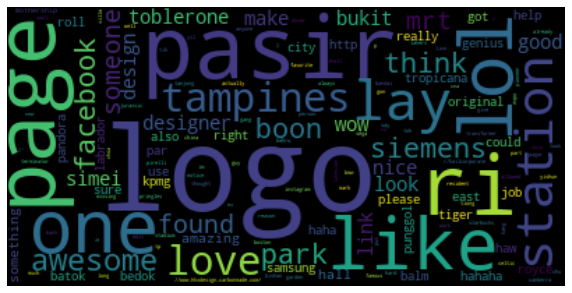

Post title: Here is my mom standing next to an ad of herself in Bedok MRT


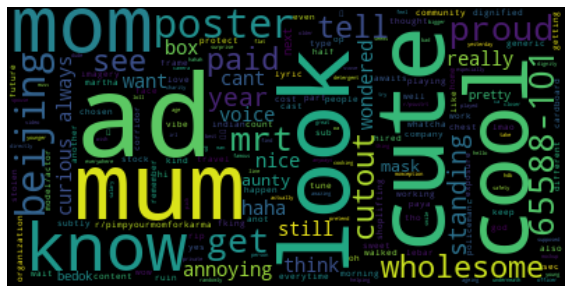

Post title: Old is gold, miss the old packaging


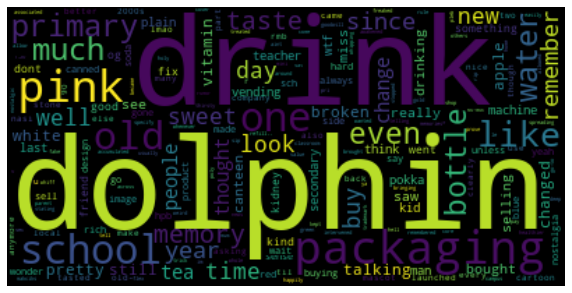

Post title: The Singapore storm yesterday!!


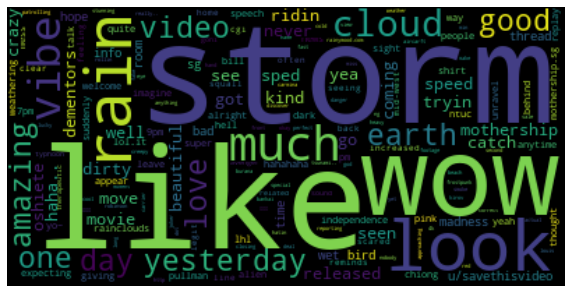

Post title: Thank you!


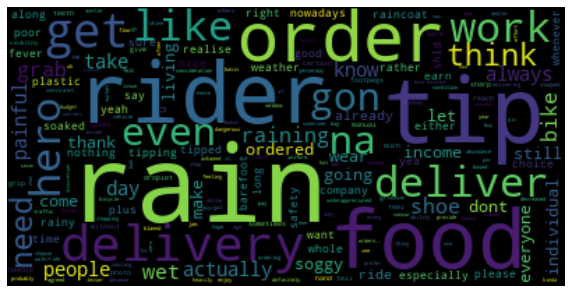

In [271]:
keys1 = ['thread0', 'thread1', 'thread2', 'thread3', 'thread4']
for key in keys1:
    threadtext2 = alltext[key]['title'] + " " + ' '.join([line for line in alltext[key]['body']])
    
    # Convert free text into tokens
    words2 = word_tokenize(threadtext2)
    
    # Remove punctuation
    words_nop2 = [w for w in words2 if w not in string.punctuation + "\"'`'...’“”``'''"]
    
    # Convert all characters to lower case
    words_lower2 = [w.lower() for w in words_nop2]

    # Remove stopwords from words
    words_nostop2 = [w for w in words_lower2 if w not in stop_words]
    
    # remove numbers
    words_nonum2 = [w for w in words_nostop2 if not w.isnumeric()]
    
    # lemmatize words
    words_lem2 = [wnl.lemmatize(w) for w in words_nonum2]
    print("Post title: " + alltext[key]['title'])
    
    # Generate wordcloud from frequency
    wc2 = WordCloud(background_color="black")
    wc2.generate_from_frequencies(nltk.FreqDist(words_lem2))
    plt.figure(figsize=(10,8))
    plt.imshow(wc2, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Text Analysis of posts - Clustering

In [293]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn import metrics

In [221]:
keys1 = ['thread0', 'thread1']
for key in keys1:
    threadtext2 = [alltext[key]['title'] + " " + ' '.join([line for line in alltext[key]['body']])]
    vec_tf = CountVectorizer()
    tf = vec_tf.fit_transform(threadtext2)
    print(vec_tf.get_feature_names()[0:20])
    # print(tf)

['13', '19', '2nd', '70', '90', '95', 'ability', 'able', 'about', 'active', 'actually', 'adaptability', 'afford', 'after', 'ah', 'albeit', 'all', 'allowed', 'almost', 'along']
['10', '300', '360', 'about', 'absolute', 'actually', 'adapt', 'ago', 'air', 'all', 'also', 'anbu', 'and', 'any', 'anyway', 'are', 'arrested', 'as', 'ask', 'at']


In [225]:
print(tf)

  (0, 128)	1
  (0, 6)	1
  (0, 190)	1
  (0, 173)	4
  (0, 185)	4
  (0, 46)	2
  (0, 302)	3
  (0, 292)	6
  (0, 283)	2
  (0, 210)	3
  (0, 184)	9
  (0, 262)	17
  (0, 156)	20
  (0, 235)	1
  (0, 110)	1
  (0, 275)	11
  (0, 89)	4
  (0, 311)	11
  (0, 1)	1
  (0, 91)	4
  (0, 177)	4
  (0, 297)	3
  (0, 206)	1
  (0, 73)	3
  (0, 85)	1
  :	:
  (0, 41)	1
  (0, 13)	1
  (0, 50)	1
  (0, 229)	1
  (0, 281)	1
  (0, 151)	1
  (0, 228)	1
  (0, 240)	1
  (0, 195)	1
  (0, 15)	1
  (0, 64)	1
  (0, 79)	1
  (0, 63)	1
  (0, 213)	1
  (0, 124)	1
  (0, 167)	1
  (0, 196)	1
  (0, 197)	1
  (0, 99)	1
  (0, 149)	1
  (0, 104)	1
  (0, 307)	1
  (0, 161)	1
  (0, 260)	1
  (0, 145)	1


In [223]:
# convert to an array
tf_a = tf.toarray()
tf_a

array([[ 1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,
         2,  1,  2,  3,  1,  1,  1,  2,  1,  1,  1,  6,  2,  1,  1,  1,
         1,  2,  2,  1,  1,  1,  1,  1,  3,  1,  1,  4,  1,  1,  2,  1,
         1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  2,  3,  1,  1,  1,  1,  1,  1,
         1,  2,  1,  1,  9,  1,  1,  2,  1,  4,  2,  4,  2,  1,  1,  1,
         2,  1,  1,  1,  1,  4,  1,  1,  1,  2,  4,  1,  1,  1,  1, 20,
         1,  1,  1,  1,  5,  6,  2,  1,  5,  1,  1,  7,  1,  1,  1,  1,
         1,  8,  1,  1,  9,  8,  2,  1,  1,  5,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  4,  1,  1,  2,  1,  1,  2,  1,  2, 20,  1,  1,  1,
         1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  4,  1,  1,
         1,  4,  1,  1,  6,  2,  1,  1,  9,  4,  1,  1,  1,  1,  1,  1,
         2,  4,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
         1,  2,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1, 

In [228]:
# stopword removal
vec_tf_3 = CountVectorizer(stop_words='english')
tf_3 = vec_tf_3.fit_transform(threadtext2)
print(tf_3)

  (0, 95)	1
  (0, 5)	1
  (0, 133)	1
  (0, 28)	2
  (0, 116)	20
  (0, 173)	1
  (0, 65)	4
  (0, 1)	1
  (0, 220)	3
  (0, 148)	1
  (0, 63)	1
  (0, 33)	1
  (0, 175)	1
  (0, 43)	1
  (0, 62)	9
  (0, 215)	3
  (0, 89)	1
  (0, 151)	2
  (0, 54)	2
  (0, 61)	1
  (0, 134)	2
  (0, 49)	1
  (0, 180)	1
  (0, 117)	1
  (0, 107)	1
  :	:
  (0, 169)	1
  (0, 152)	1
  (0, 71)	1
  (0, 121)	1
  (0, 114)	1
  (0, 19)	1
  (0, 96)	1
  (0, 32)	1
  (0, 168)	1
  (0, 207)	1
  (0, 112)	1
  (0, 167)	1
  (0, 137)	1
  (0, 46)	1
  (0, 45)	1
  (0, 91)	1
  (0, 138)	1
  (0, 139)	1
  (0, 73)	1
  (0, 110)	1
  (0, 77)	1
  (0, 223)	1
  (0, 120)	1
  (0, 195)	1
  (0, 106)	1


In [231]:
# tfidf indexing
vec_tfidf = TfidfVectorizer() #min_df = 2)
tfidf = vec_tfidf.fit_transform(threadtext2)
print(tfidf)

  (0, 145)	0.01859198597837567
  (0, 260)	0.01859198597837567
  (0, 161)	0.01859198597837567
  (0, 307)	0.01859198597837567
  (0, 104)	0.01859198597837567
  (0, 149)	0.01859198597837567
  (0, 99)	0.01859198597837567
  (0, 197)	0.01859198597837567
  (0, 196)	0.01859198597837567
  (0, 167)	0.01859198597837567
  (0, 124)	0.01859198597837567
  (0, 213)	0.01859198597837567
  (0, 63)	0.01859198597837567
  (0, 79)	0.01859198597837567
  (0, 64)	0.01859198597837567
  (0, 15)	0.01859198597837567
  (0, 195)	0.01859198597837567
  (0, 240)	0.01859198597837567
  (0, 228)	0.01859198597837567
  (0, 151)	0.01859198597837567
  (0, 281)	0.01859198597837567
  (0, 229)	0.01859198597837567
  (0, 50)	0.01859198597837567
  (0, 13)	0.01859198597837567
  (0, 41)	0.01859198597837567
  :	:
  (0, 85)	0.01859198597837567
  (0, 73)	0.05577595793512701
  (0, 206)	0.01859198597837567
  (0, 297)	0.05577595793512701
  (0, 177)	0.07436794391350268
  (0, 91)	0.07436794391350268
  (0, 1)	0.01859198597837567
  (0, 311)	0.20

In [232]:
tfidf.toarray()[:10, :20]

array([[0.01859199, 0.01859199, 0.01859199, 0.03718397, 0.01859199,
        0.01859199, 0.01859199, 0.01859199, 0.01859199, 0.01859199,
        0.01859199, 0.01859199, 0.16732787, 0.01859199, 0.01859199,
        0.01859199, 0.03718397, 0.01859199, 0.03718397, 0.05577596]])

In [285]:
def pre_process(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation + "\"'`'...’“”``'''"]
    # remove numbers
    tokens = [t for t in tokens if not t.isnumeric()]
    tokens = [wnl.lemmatize(t.lower()) for t in tokens]
    tokens = [t for t in tokens if t not in stop_words]
    # tokens = [t for t in tokens if len(t) >= 3]
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [317]:
docs = pd.DataFrame.from_dict(threadtext, orient = 'index', columns = ['text']) 
  
docs2 = docs['text'].apply(pre_process) 

In [321]:
docs.head()

text
thread0  Someone redesigned all our MRT stations as fam...
thread1  Here is my mom standing next to an ad of herse...
thread2  Old is gold, miss the old packaging nostalgic ...
thread3  The Singapore storm yesterday!! Expecting an a...
thread4  Thank you! Just feeling sad for him coz he's p...

In [322]:
docs2.head()

thread0    someone redesigned mrt station famous logo lol...
thread1    mom standing next ad bedok mrt pretty cool r/p...
thread2    old gold miss old packaging nostalgic remember...
thread3    storm yesterday expecting alien mothership app...
thread4    thank feeling sad coz probably gon na get tipp...
Name: text, dtype: object

In [323]:
# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=0.7, max_features=2500,
                             min_df=3, stop_words = stop_words,
                             use_idf=True)
X = vectorizer.fit_transform(docs2)
X.shape

(25, 1094)

In [324]:
print(X)

  (0, 608)	0.03303278154136435
  (0, 442)	0.029952979492048476
  (0, 641)	0.0368021546133911
  (0, 876)	0.10473442568008694
  (0, 811)	0.04851089681976977
  (0, 7)	0.039057786168346334
  (0, 136)	0.039057786168346334
  (0, 174)	0.04851089681976977
  (0, 420)	0.041661721698427155
  (0, 1088)	0.041661721698427155
  (0, 252)	0.02734904396196766
  (0, 672)	0.04851089681976977
  (0, 1054)	0.04474152374774303
  (0, 391)	0.0314227882293077
  (0, 206)	0.03481254657708453
  (0, 338)	0.0314227882293077
  (0, 971)	0.03481254657708453
  (0, 16)	0.039057786168346334
  (0, 461)	0.04474152374774303
  (0, 89)	0.028600886522568505
  (0, 171)	0.04851089681976977
  (0, 659)	0.03481254657708453
  (0, 697)	0.03303278154136435
  (0, 167)	0.04851089681976977
  (0, 954)	0.03481254657708453
  :	:
  (24, 1020)	0.07619389260117909
  (24, 898)	0.10848912675639236
  (24, 876)	0.06348993860506419
  (24, 391)	0.07619389260117909
  (24, 562)	0.06935135291293364
  (24, 1064)	0.07262990431809759
  (24, 74)	0.0608464390

In [325]:
# Divide the 25 posts into 3 clusters
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.

km3 = KMeans(n_clusters=3, init='k-means++', max_iter=2000)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [326]:
# Evaluate the 3 clusters 
# Coefficient: more similar within clusters, more distant between clusters
# The higher the better (-1 to 1)
# value near 0 indicates overlapping clusters

print("Coefficient for 3 clusters: %0.3f"
      % metrics.silhouette_score(X, km3.labels_))

Coefficient for 3 clusters: 0.025


In [337]:
print(km3.labels_)

docs['labels3'] = km3.labels_

[2 2 1 1 2 2 2 2 0 1 2 2 2 0 1 2 2 0 1 1 2 0 2 2 1]


In [335]:
labels, counts = np.unique(km3.labels_[km3.labels_>=0], return_counts=True)
print (labels)
print (counts)

[0 1 2]
[ 4  7 14]


In [336]:
# What each cluster is about

def print_terms(cm, num):
    original_space_centroids = cm.cluster_centers_
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :50]:
            print(' %s' % terms[ind], end='')
        print()


print_terms(km3, 3)

Cluster 0: thank shot thanks love photo void pic deck colour word kind film little around corridor uncle camera blue op shoot reflection picture door lightroom yes beautiful new highlight hue light exposure rtx great shooting location black west use using green number first near looking shadow block second yup hdb taking
Cluster 1: school chinese day packaging drink vibe light rain dark pink back meeting wild yesterday much sky miss 30 cute class wow water remember english always hour primary fish name love home looking race old come lot saw ah teacher memory park lady long wish earth student beautiful right correct culture
Cluster 2: work mask sign shit burger game ad life guy thing food http know want com rain give map someone tip check better na link youtube day right could need put must well much post toilet use city pas station cool watch face hour shall always mrt doe made first video


In [341]:
# Now divide the 25 posts into 4 clusters

km4 = KMeans(n_clusters=4, init='k-means++', max_iter=2000)
km4.fit(X)
print("Coefficient for 4 clusters: %0.3f"
      % metrics.silhouette_score(X, km4.labels_))
print(km4.labels_)

docs['labels4'] = km4.labels_

Coefficient for 3 clusters: 0.025
[2 2 0 2 3 3 3 3 1 3 2 3 3 1 0 2 2 1 2 0 3 1 3 3 1]


In [342]:
labels4, counts4 = np.unique(km4.labels_[km4.labels_>=0], return_counts=True)
print (labels4)
print (counts4)

[0 1 2 3]
[ 3  5  7 10]


In [343]:
print_terms(km4, 4)

Cluster 0: school chinese drink packaging pink 30 primary old teacher memory class day back light ah english dark vibe water secondary level come singaporean student confirm feel since remember cool language wake saw use china taste speak read much friend miss sentence sweet hated well going thinking mean yes copy anime
Cluster 1: thank love shot thanks photo void pic little deck colour word kind picture film light looking around beautiful corridor uncle camera blue op west everyone great shoot reflection door lightroom yes miss lady race different new highlight hue culture exposure rtx vibe found shooting yesterday 10 location black use using
Cluster 2: ad burger cute game http com link youtube mrt wow video park fish love wild sign cool awesome much amazing rain watch better station long vibe fun doe www haha voice please never thought well old mom yesterday remember part seen app side sg day always work east google right
Cluster 3: work mask shit life hour rain map day thing guy wan

In [345]:
# Now divide the 25 posts into 5 clusters

km5 = KMeans(n_clusters=5, init='k-means++', max_iter=2000)
km5.fit(X)
print("Coefficient for 5 clusters: %0.3f"
      % metrics.silhouette_score(X, km5.labels_))
print(km5.labels_)

docs['labels5'] = km5.labels_

Coefficient for 5 clusters: 0.023
[0 0 4 3 3 4 4 4 2 4 0 4 4 2 4 4 0 2 4 4 4 2 1 3 2]


In [346]:
labels5, counts5 = np.unique(km5.labels_[km5.labels_>=0], return_counts=True)
print (labels5)
print (counts5)

[0 1 2 3 4]
[ 4  1  5  3 12]


In [347]:
print_terms(km5, 5)

Cluster 0: burger ad http com link youtube cute mrt watch video cool awesome station www old mom love app better work paid park haha fun wow proud voice hall funny tell stuff roll hahaha thanks doe someone give part na famous know great content found help pretty person amazing right much
Cluster 1: damn hot check bay metal pas finally fuck sense shit wow side great na kinda ca hand new day love fish nut band potential ai local hang cover hospital create fucked scale bigger bruh stupid open weird shall turned yet reference thats body human anymore believe door fellow found giving
Cluster 2: thank love shot thanks photo void pic little deck colour word kind picture film light looking around beautiful corridor uncle camera blue op west everyone great shoot reflection door lightroom yes miss lady race different new highlight hue culture exposure rtx vibe found shooting yesterday 10 location black use using
Cluster 3: rain tip wet yesterday food yea wow order deliver much day guy earth rain

In [351]:
pd.set_option('display.max_colwidth', None)
docs

text  \
thread0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Clustering is not very successful as the number of documents is small - coefficients of clusters are very low. 